# Breast Cancer Prediction Using Python

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
os.getcwd()

'/Users/surykanthulageri'

In [3]:
os.chdir('/Users/surykanthulageri/Desktop')
os.getcwd()

'/Users/surykanthulageri/Desktop'

In [4]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.shape

(569, 32)

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

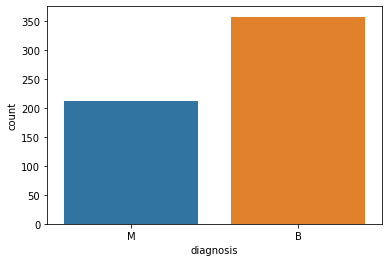

In [12]:
sns.countplot(df['diagnosis'],label = 'Count')

<AxesSubplot:xlabel='radius_mean', ylabel='count'>

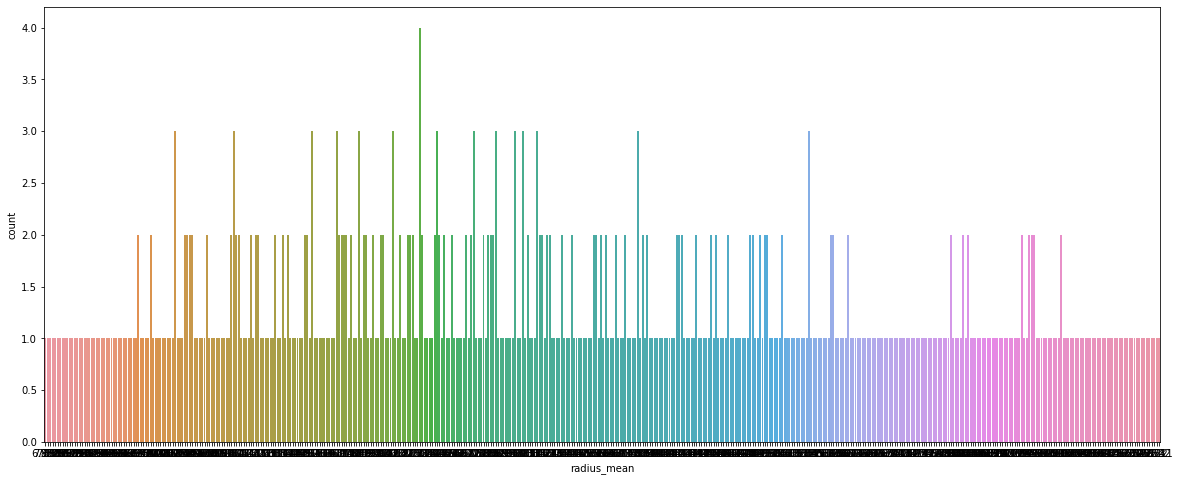

In [13]:
# Counter plot of feature mean radius
plt.figure(figsize = (20,8))
sns.countplot(df['radius_mean'])

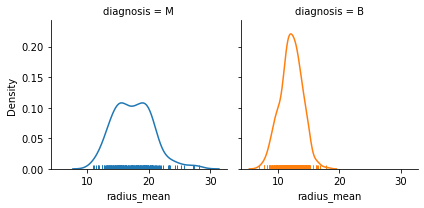

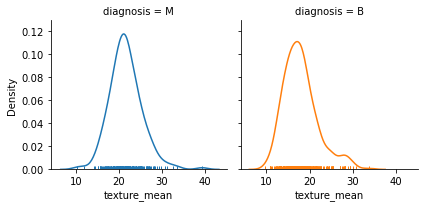

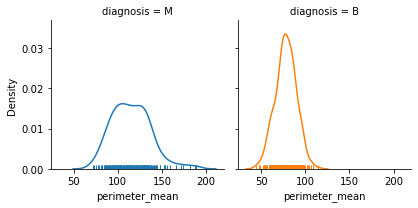

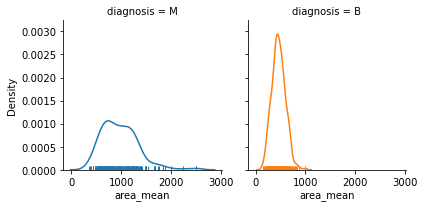

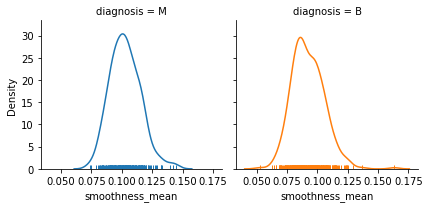

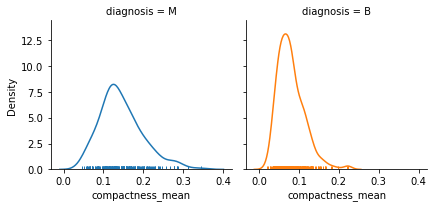

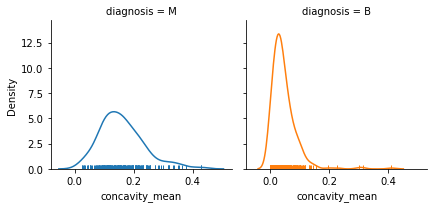

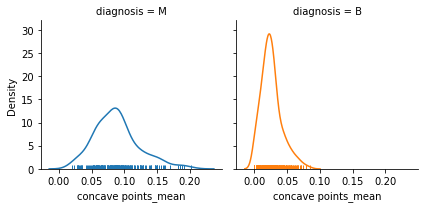

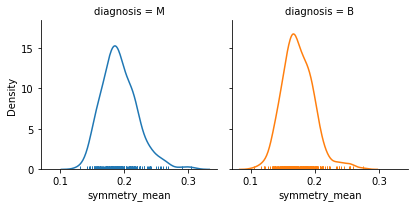

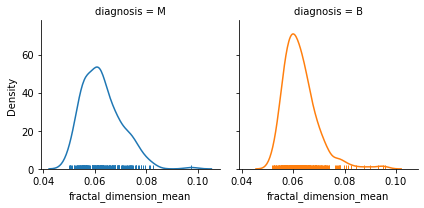

In [14]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "radius_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'texture_mean', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'perimeter_mean', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "area_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "smoothness_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "compactness_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concavity_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concave points_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "symmetry_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "fractal_dimension_mean", hist = False, rug = True)


In [15]:
# Label Encoding (convert the value of M and B into 1 and 0).
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
df.iloc[:,1] = le_y.fit_transform(df.iloc[:,1].values)

In [16]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


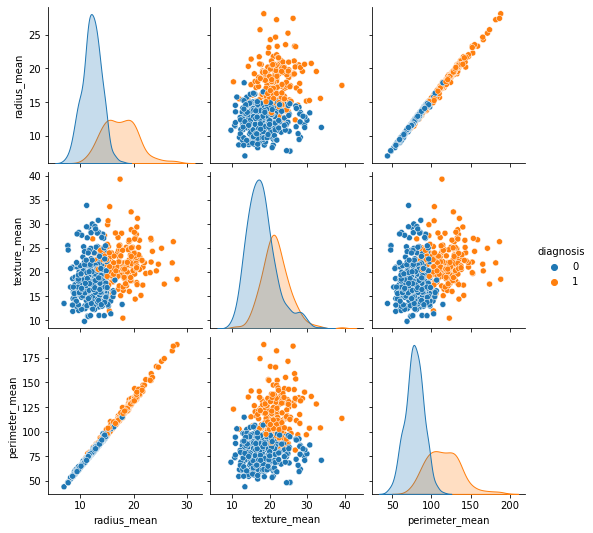

In [17]:
sns.pairplot(df.iloc[:,1:5],hue = 'diagnosis')

In [18]:
# Correlation Barplot

df2 = df.drop(['id','diagnosis'],axis = 1)
print('The shape of df2: ',df2.shape)

The shape of df2:  (569, 30)


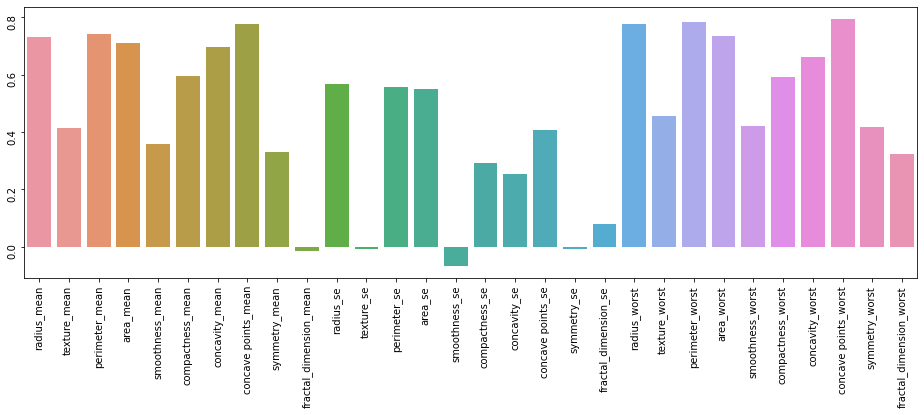

In [19]:
plt.figure(figsize = (16,5))
ax = sns.barplot(df2.corrwith(df.diagnosis).index,df2.corrwith(df.diagnosis))
ax.tick_params(labelrotation = 90)

In [20]:
# Get the correlation
df.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

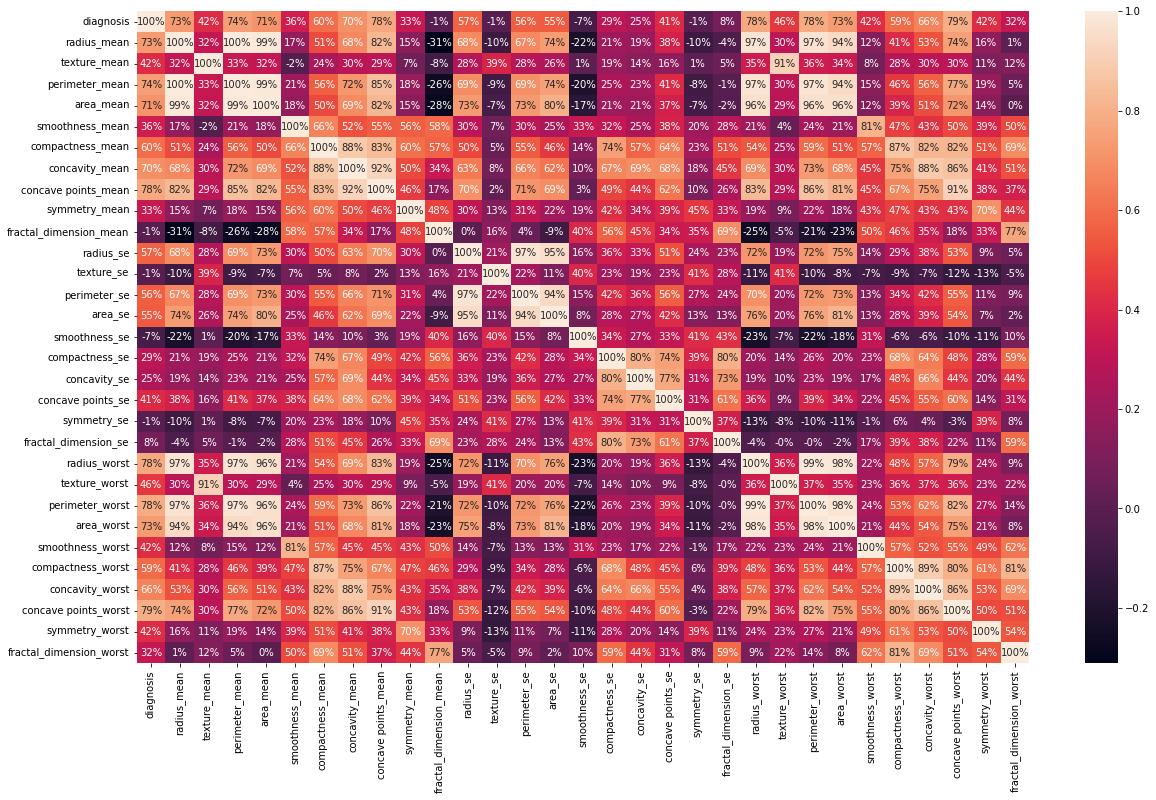

In [21]:
# Visualize the correlation using Heatmap.
plt.figure(figsize = (20,12))
sns.heatmap(df.iloc[:,1:32].corr(),annot = True,fmt = '.0%')

<AxesSubplot:>

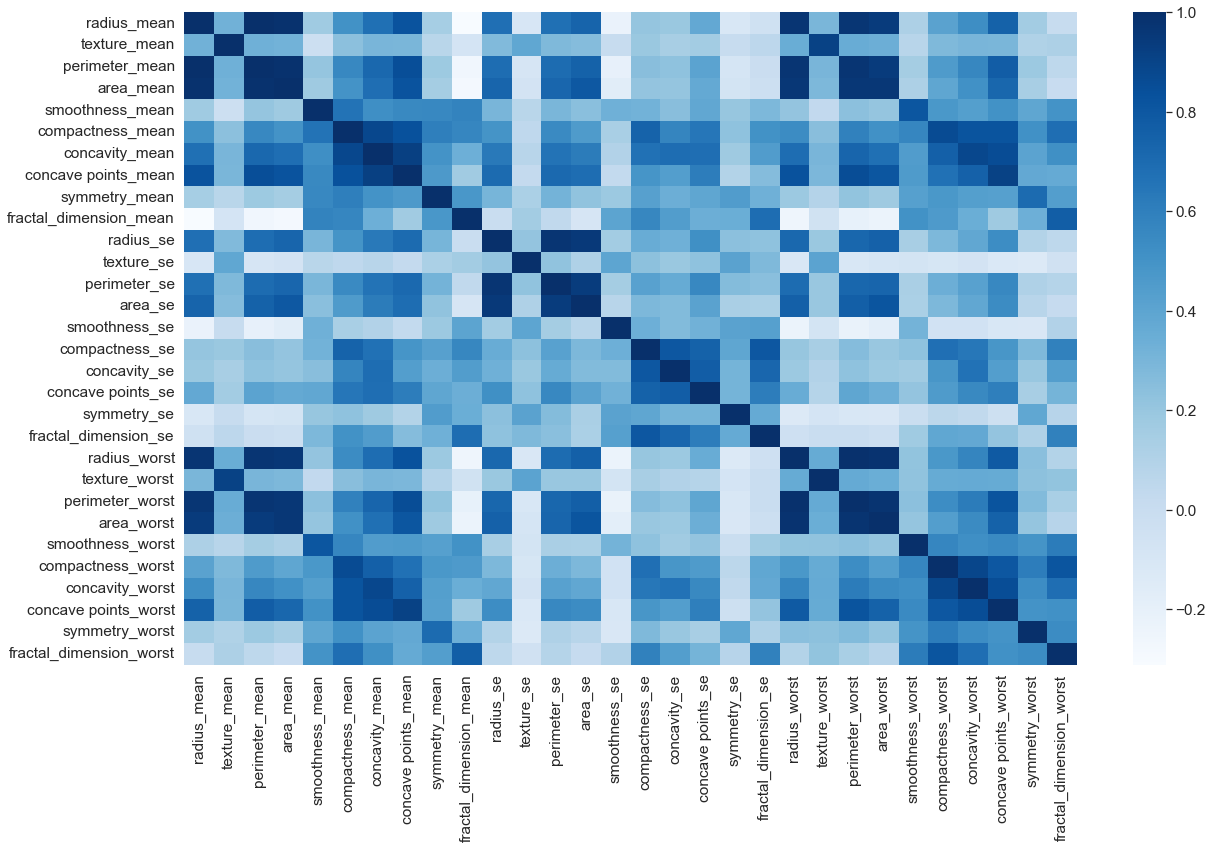

In [22]:
plt.rcParams['figure.figsize']=(20,12)
sns.set(font_scale=1.4)
sns.heatmap (df.drop('diagnosis',axis =1).drop('id',axis =1).corr(),cmap = "Blues")

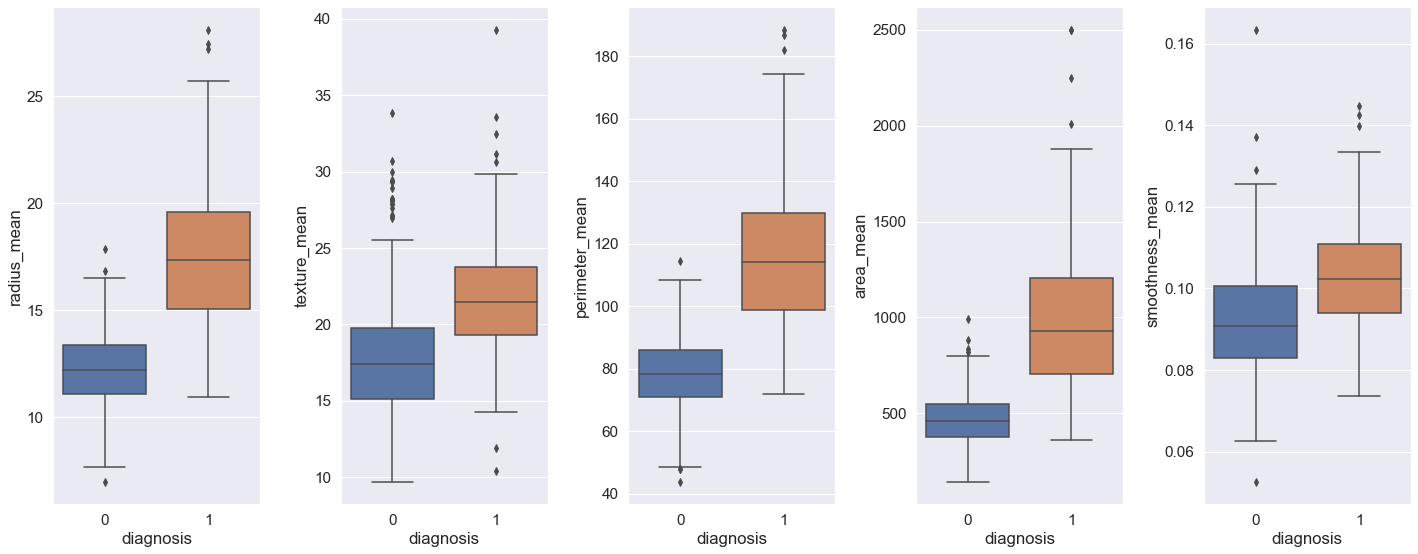

In [23]:
plt.rcParams['figure.figsize']=(20,8)
f,(ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot ('diagnosis', y = 'radius_mean',data = df , ax = ax1)
sns.boxplot ('diagnosis', y = 'texture_mean',data = df , ax = ax2)
sns.boxplot ('diagnosis', y = 'perimeter_mean',data = df , ax = ax3)
sns.boxplot ('diagnosis', y = 'area_mean',data = df , ax = ax4)
sns.boxplot ('diagnosis', y = 'smoothness_mean',data = df , ax = ax5)
f.tight_layout()

In [24]:
# Split the dataset into Dependent(X) and Independent(Y) datasets.
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [25]:
print(X)

[[ 17.99    10.38   122.8    ...   0.7119   0.2654   0.4601]
 [ 20.57    17.77   132.9    ...   0.2416   0.186    0.275 ]
 [ 19.69    21.25   130.     ...   0.4504   0.243    0.3613]
 ...
 [ 16.6     28.08   108.3    ...   0.3403   0.1418   0.2218]
 [ 20.6     29.33   140.1    ...   0.9387   0.265    0.4087]
 [  7.76    24.54    47.92   ...   0.       0.       0.2871]]


In [26]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [27]:
# Spliting the data into training and test dataset.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 0)

In [28]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
print(X_train)

[[-1.15036482 -0.39064196 -1.12855021 ... -0.81232053 -0.75798367
  -0.01614761]
 [-0.93798972  0.68051405 -0.94820146 ... -0.37504806 -0.60687023
   0.09669004]
 [ 0.574121   -1.03333557  0.51394098 ... -0.18298917 -0.02371948
  -0.20050207]
 ...
 [-1.32422924 -0.20048168 -1.31754581 ... -0.76769066 -0.97974953
  -0.71542314]
 [-1.24380987 -0.2245526  -1.28007609 ... -1.34136004 -1.75401433
  -1.58157125]
 [-0.73694129  1.14989702 -0.71226578 ...  0.47893704 -0.27460457
  -1.25895095]]


In [30]:
print(X_test)

[[-0.22609091  0.14299357 -0.16219992 ...  0.91450514  1.33438591
   1.22101459]
 [-0.28072076  1.13113906 -0.34954245 ... -0.63253907 -0.81952682
  -0.77541863]
 [-0.04782508 -0.87231025 -0.12299829 ... -0.95060736 -0.49120548
  -1.31433312]
 ...
 [ 1.7233322  -0.06173848  1.70132185 ...  0.99860173  1.51554921
   0.25341812]
 [ 1.18565945  0.15552818  1.16487847 ...  0.35372243  0.53103066
   0.32690646]
 [ 0.24545096 -0.64668718  0.25416267 ... -0.43853407 -0.19956228
  -1.2425945 ]]


In [31]:
# Models/ Algorithms (1)

def models1(X_train,Y_train):
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train,Y_train)
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state = 0,criterion = 'entropy')
    tree.fit(X_train,Y_train)
    
    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(random_state = 0,criterion = 'entropy',n_estimators = 10)
    forest.fit(X_train,Y_train)
    
    
    print('[0]Logistic Regression accuracy: ',log.score(X_train,Y_train))
    print('[1]Decision Tree accuracy: ',tree.score(X_train,Y_train))
    print('[2]Random forest accuracy: ',forest.score(X_train,Y_train))
    
    return log,tree,forest


In [32]:
model_1 = models1(X_train,Y_train)

[0]Logistic Regression accuracy:  0.9912087912087912
[1]Decision Tree accuracy:  1.0
[2]Random forest accuracy:  0.9978021978021978


In [33]:
# Testing the model/result

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model_1)):
    print('Model',i)
    print(classification_report(Y_test,model_1[i].predict(X_test)))
    print('Accuracy: ',accuracy_score(Y_test,model_1[i].predict(X_test)))

Model 0
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy:  0.9649122807017544
Model 1
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

Accuracy:  0.9385964912280702
Model 2
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97 

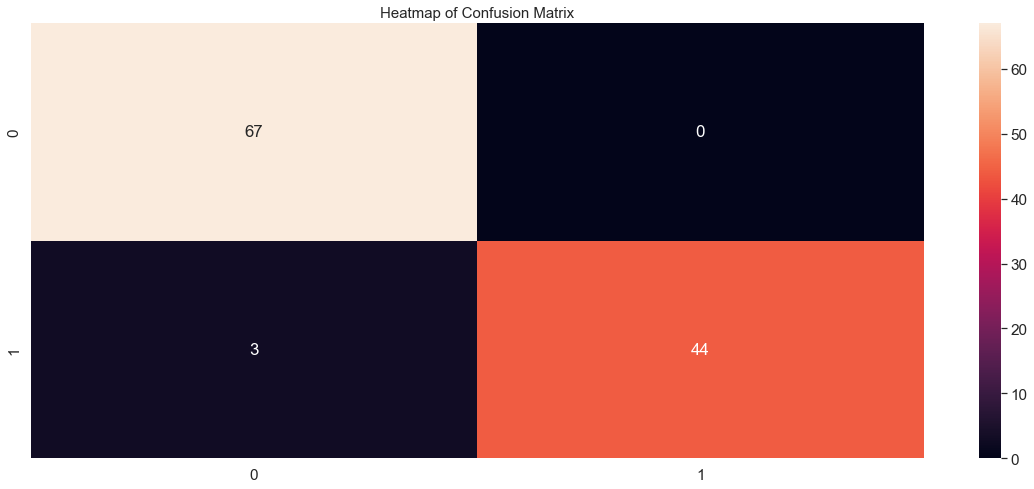

In [34]:
# Confusion Matrix

cm_1 = confusion_matrix(Y_test,model_1[2].predict(X_test))
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm_1, annot = True)
plt.show()

In [35]:
# Prediction of Random-Forest due to high accuracy

y_pred = model_1[2].predict(X_test)
print('Predicted values: ')
print(y_pred)
print('Actual values: ')
print(Y_test)

Predicted values: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
Actual values: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


In [36]:
# Models/ Algorithms (2)

def models2(X_train,Y_train):
    # Support Vector Classifier 
    from sklearn.svm import SVC
    svm = SVC()
    svm.fit(X_train,Y_train)
    
    # Naive Bayes Classifier
    from sklearn.naive_bayes import GaussianNB
    gnb =  GaussianNB()
    gnb.fit(X_train,Y_train)
    
    # XGBoost Classifier
    from xgboost import XGBClassifier
    xgb = XGBClassifier()
    xgb.fit(X_train,Y_train)
    
    
    print('[3]Support Vector Machine accuracy: ',svm.score(X_train,Y_train))
    print('[4]Naive Bayes accuracy: ',gnb.score(X_train,Y_train))
    print('[5]XGBoost accuracy: ',xgb.score(X_train,Y_train))
    
    return svm,gnb,xgb

In [37]:
model_2 = models2(X_train,Y_train)

[3]Support Vector Machine accuracy:  0.9846153846153847
[4]Naive Bayes accuracy:  0.9494505494505494
[5]XGBoost accuracy:  1.0


In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model_2)):
    print('Model',i)
    print(classification_report(Y_test,model_2[i].predict(X_test)))
    print('Accuracy: ',accuracy_score(Y_test,model_2[i].predict(X_test)))

Model 0
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy:  0.9824561403508771
Model 1
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

Accuracy:  0.9385964912280702
Model 2
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95 

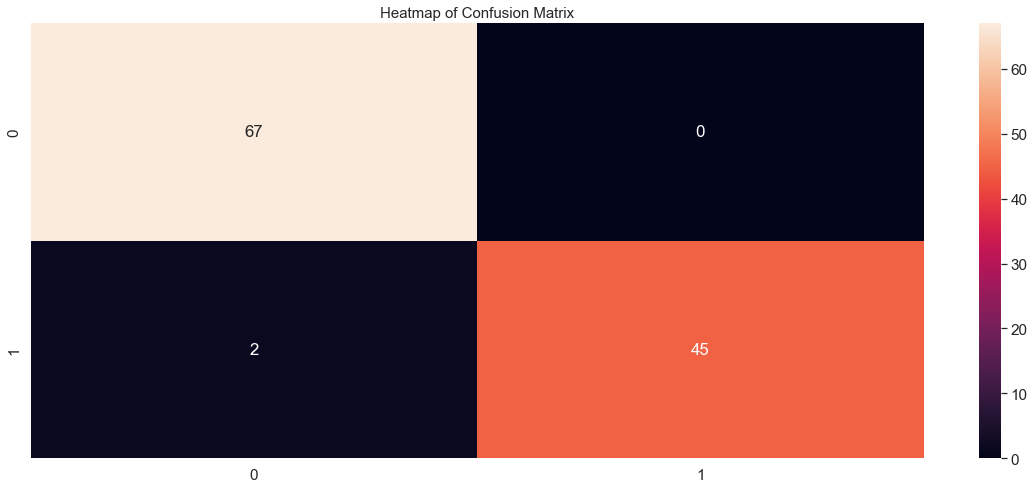

In [39]:
# Confusion Matrix

cm_2 = confusion_matrix(Y_test,model_2[0].predict(X_test))
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm_2, annot = True)
plt.show()

In [40]:
# Prediction of SVM due to high accuracy

y_prediction = model_2[0].predict(X_test)
print('Predicted values: ')
print(y_prediction)
print('Actual values: ')
print(Y_test)

Predicted values: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0]
Actual values: 
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
